# Convolution

$$f(t) * g(t)$$

$$F(s) = \int_0^\infty e^{-st} f(t)\ dt$$
$$G(s) = \int_0^\infty e^{-st} g(t)\ dt$$

$$F(s) G(s) = \int_0^\infty e^{-st}(f * g)\ dt$$

Laplace transform is the continuous analog to power series

When we turn power series into Laplace Transform, $n \to t$ and $x \to e^{-s}$

Power series: $$F(x) = \sum_0^\infty a_n x^n$$
$$G(x) = \sum_0^\infty b_n x^n$$

$$F(x)G(x) = \sum_0^\infty c_n x^n$$

Is there a formula for $c_n$ in terms of $a_n, b_n$? Yes, figure it out yourself.

The formula for $c_n$ is called convolution

$$f(t) * g(t) = \int_0^t f(u)g(t-u)\ du$$

Is $f * g = g * f$? Yes, since $F(s)G(s) = G(s)F(s)$


## Try some examples of $f(t), g(t)$

Suppose $f(t) = t^2, g(t) = t$, solve using definition of convolution

$$\begin{align}
t^2 * t & = \int_0^t u^2.(t - u)\ du \\
& = \frac{u^3}{3}t - \frac{u^4}{4}|_0^t \\
& = \frac{t^4}{3} - \frac{t^4}{4} \\
& = \frac{t^4}{12}
\end{align}$$

solve using Laplace transform
$$\begin{align}
t^2 * t & = \frac{2}{s^3} \frac{1}{s^2} \\
& = \frac{2}{s^5} \\
\mathscr{L^{-1}}(\frac{2}{s^5}) & = \mathscr{L^{-1}}(\frac{1}{12} \frac{4!}{s^5})  \\
& = \frac{t^4}{12}
\end{align}$$

So it works.

Suppose $g(t) = 1$

$$f(t) * g(t) = \int_0^tf(u)\ du $$

## Prove the following statement is true 

$$F(s) G(s) = \int_0^\infty e^{-st}(f * g)\ dt$$

Starts from here

$$\begin{align}
F(s)G(s) & = \int_0^\infty e^{-su}f(u)\ du \int_0^\infty e^{-sv}g(v)\ dv \\
& = \int_0^\infty \int_0^\infty e^{-s(u + v)} f(u) g(v)\ du\ dv \\
& = \iint f(u) g(t - u)\ du\ dt
\end{align}$$

In the last step, we change variable, $t = u + v$, $u = u$, $v = t - u$. And the Jacobian is 1.

$$du\ dv = \frac{\partial (u,v)}{\partial (u,t)}\ du\ dt$$

The Jacobian is $$J = \begin{vmatrix} 1 & 0 \\ -1 & 1 \end{vmatrix} = 1$$

Next, need to figure out the change in limit which is the most difficult part

Because it is $du\ dt$, so first u is varied, t is fixed. $t = u + v$, so $u + v$ is fixed. 

Let say u-v plane, $du\ dv$ means we are integrating positive u, positive v region.

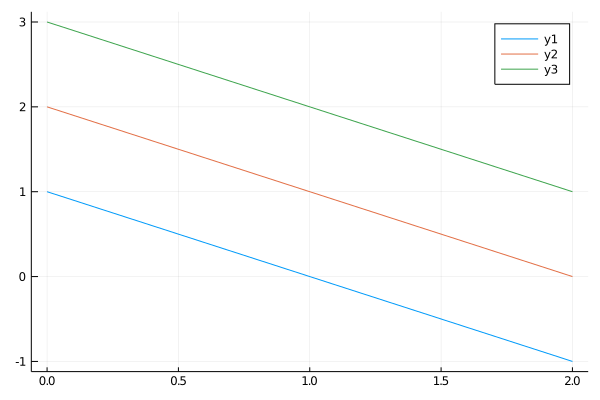

In [5]:
using Plots
v(u) = -u + 1  # u is x-axis, v is y-axis
plot(v, 0, 2)
plot!(u->-u + 2, 0, 2)
plot!(u->-u + 3, 0, 2)

u enter the region from u = 0, and leave the region when v = 0 or u = t. So integration u from 0 to t. While t starts from 0, and u + v goes to infinity

$$F(s)G(s) = \int_0^\infty \int_0^t e^{-st} f(u) g(t-u)\ du\ dt$$

$e^{-st}$ has no u component so, we can factor it out

$$F(s)G(s) = \int_0^\infty e^{-st} \int_0^t  f(u) g(t-u)\ du\ dt$$

Then we have definition of convolution, $f(t) * g(t) = \int_0^t f(u)g(t-u)\ du$, finally we get

$$F(s) G(s) = \int_0^\infty e^{-st}(f * g)\ dt$$

## Application of Convolution

Radioactive waste: $f(t)$ is dumping rate, t is years

Say $\Delta t$ is the time interval from $t_i$ to $t_{i + 1}$, amount dumped $[t_i, t_{i+1}] \approx f(t_i) \Delta t$. The smaller amount of time interval we take, the more accurate of the amount.

Problem: Start dumping at t = 0, at time t, how much radioactive waste is in the pile?

Initial amount $A_0$. Amount left in time t is $A_0 e^{-kt}$. Assume k fixed. And the stuff is dumped at interval $[u_i, u_{i+1}]$. $u_1$ is the first dump, $u_2$ is the second dump, and so on to $u_n$

Amount dumped in $[u_i, u_{i+1}] \approx f(u_i) \Delta u$. By the time t, it has decayed to $f(u_i) \Delta u . e^{-k(t - u_i)}$

$t - u_i$ is the length it had on pile

Total amount left at time t is sum of amount dumped times the decay factor

$$ \sum_{i = 1}^n f(u_i) \Delta u . e^{-k(t - u_i)}$$

Taking the smaller and smaller interval, or let $\Delta u \to 0$

$$ \int_{0}^t f(u) e^{-k(t - u)}\ du = f(t) * e^{-kt}$$


### Suppose dumping garbage which is undecaying

Then the decaying factor is a constant

$$f(t) * 1 = \int_0^t f(u)\ du$$

### Suppose dumping something grow by t

For example, dumping baby chicken which will grow linearly by t

$f(t)$ will be the production rate of chicken. $t$ is linear growth of baby chicken. Convolution will tell us the kg of chicken at time t

$$f(t) * t$$

